In [1]:
print("I have extracted the data set of Indian Premier League(IPL). We Indians are big fan of cricket, so the good exploratory analysis would be helpful aand exciting for every cricket fan. In this Notebook I tried to do Basic Analysis like Teams with maximum matches, wins,etc Batsman Analysis, Bowler Analysis ,200+ scores analysis")

I have extracted the data set of Indian Premier League(IPL). We Indians are big fan of cricket, so the good exploratory analysis would be helpful aand exciting for every cricket fan. In this Notebook I tried to do Basic Analysis like Teams with maximum matches, wins,etc Batsman Analysis, Bowler Analysis ,200+ scores analysis


In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
matches  = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [4]:
print("We have two dataframes , 1. Matches 2. Deliveries ")

We have two dataframes , 1. Matches 2. Deliveries 


In [5]:
matches.head(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN


In [6]:
print("Matches dataframe contains information about city in which match was played, date and team names , toss_winner and decision , result ,player of the match and umpires  ")

Matches dataframe contains information about city in which match was played, date and team names , toss_winner and decision , result ,player of the match and umpires  


In [7]:
deliveries.head(4)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [8]:
print("Deliveries dataframe contains information about match and its deliveries")

Deliveries dataframe contains information about match and its deliveries


In [9]:
matches.shape

(636, 18)

In [10]:
print("matches dataframe contains 636 rows and 18 columns ")

matches dataframe contains 636 rows and 18 columns 


In [11]:
deliveries.shape

(150460, 21)

In [12]:
print("deliveries dataframe contains 150460 rows and 21 columns ")

deliveries dataframe contains 150460 rows and 21 columns 


In [13]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [14]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [15]:
print("Integer variables are : id, season, wins_by_runs, wins_by_wickets, dl_applied")
print("Object variable are : city, date, team1, team2, toss_winner,player_of_match , toss_decision, result, winner, venue, umpire1, umpire2 ")
print("float : umpire3")


Integer variables are : id, season, wins_by_runs, wins_by_wickets, dl_applied
Object variable are : city, date, team1, team2, toss_winner,player_of_match , toss_decision, result, winner, venue, umpire1, umpire2 
float : umpire3


In [16]:
#matches[['toss_winner', 'winner']].groupby(['toss_winner'], as_index=False).mean().sort_values(by='winner', ascending=False)

In [17]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [18]:
matches.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'], ['SRH', 'MI', 'GL',
       'RPS', 'RCB',
       'KKR', 'DD', 'KXIP',
       'CSK', 'RR', 'DC',
       'KTK', 'PW', 'RPS'], inplace = True )
deliveries.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'], ['SRH', 'MI', 'GL',
       'RPS', 'RCB',
       'KKR', 'DD', 'KXIP',
       'CSK', 'RR', 'DC',
       'KTK', 'PW', 'RPS'], inplace = True )

In [19]:
#title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
#for dataset in combine:
 #   dataset['Title'] = dataset['Title'].map(title_mapping)
 #   dataset['Title'] = dataset['Title'].fillna(0)

In [20]:
print('Number of teams = ' , matches['team1'].nunique())
 

Number of teams =  13


In [21]:
# total number of teams = 13 

In [22]:
print('total Number of seasons data  = ' , matches['season'].nunique())

total Number of seasons data  =  10


In [23]:
# total number of seasons = 13

In [24]:
print('In',matches['city'].nunique(), 'cities matches were held ')

In 30 cities matches were held 


In [25]:
matches.drop(['umpire3'],axis = 1, inplace = True )

In [26]:
print('we dropped umpire3 data since it has all NaN values ')

we dropped umpire3 data since it has all NaN values 


In [27]:
print(matches['toss_winner'].value_counts().idxmax(), 'won the highest number of tosses')

MI won the highest number of tosses


In [28]:
matches['toss_decision'].value_counts().sort_values( ascending=False)

field    363
bat      273
Name: toss_decision, dtype: int64

In [29]:
print('maximum toss decisions were of fielding')

maximum toss decisions were of fielding


In [30]:
matches['toss_winner'].value_counts().idxmax()

'MI'

In [31]:
print('maximum toss were won by Mumbai Indians ')

maximum toss were won by Mumbai Indians 


In [32]:
matches['winner'].value_counts().idxmax()

'MI'

In [33]:
print('maximum matches were won by Mumbai Indians ')

maximum matches were won by Mumbai Indians 


In [34]:
print(" As we can see maximum tosses were won by Mumbai Indians and Maximum matches were won by same team ")

 As we can see maximum tosses were won by Mumbai Indians and Maximum matches were won by same team 


In [35]:
matches['result'].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

In [36]:
matches['dl_applied'].value_counts()

0    620
1     16
Name: dl_applied, dtype: int64

In [37]:
matches['player_of_match'].value_counts().idxmax()

'CH Gayle'

In [38]:
print('CH Gayle has most player of the match awards  ')

CH Gayle has most player of the match awards  


In [39]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]


,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


In [40]:
print('MI won by maximum runs of 146 against DD ')

MI won by maximum runs of 146 against DD 


In [41]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]



,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


In [42]:
print('KKR won by maximum wicket  of 10 against GL  ')

KKR won by maximum wicket  of 10 against GL  


In [43]:
df = matches[matches['toss_winner'] == matches['winner'] ]
 

In [44]:
df.shape


(325, 17)

In [45]:
matches.shape

(636, 17)

In [46]:
print((636-325)*100/636, "percent toss decision leads to winning, so can't say toss winner leads to winning the match ")

48.899371069182386 percent toss decision leads to winning, so can't say toss winner leads to winning the match 


In [47]:
df['toss_winner'].value_counts()

MI      48
KKR     44
CSK     42
RCB     35
RR      34
DD      33
KXIP    28
DC      19
SRH     17
GL      10
RPS      8
KTK      4
PW       3
Name: toss_winner, dtype: int64

In [48]:
#df['toss_winner'].value_counts().plot.pie(y='toss_winner', figsize=(10, 10))

In [49]:
l = len(df)
l
data = [l, len(matches) - l ]
labels = ['yes ', 'no']

Thus the toss winner is not necessarily the match winner. The match winning probablity for toss winning team is about 50%-50%


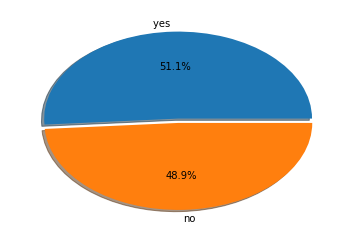

In [50]:
import matplotlib.pyplot as mlt
mlt.pie(data , labels = labels, shadow=True,explode=(0,0.05),autopct='%1.1f%%',)
print('Thus the toss winner is not necessarily the match winner. The match winning probablity for toss winning team is about 50%-50%')

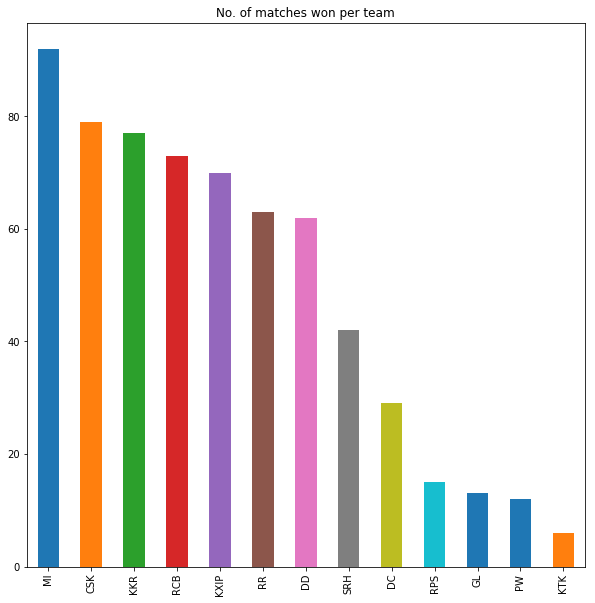

In [51]:
matches['winner'].value_counts().plot.bar(y='winner', figsize=(10, 10), title = 'No. of matches won per team')

In [52]:
print('maximum matches were won by Mumbai Indians ')

maximum matches were won by Mumbai Indians 


In [53]:
#matches['date']
matches['Date'] = pd.to_datetime(matches['date'])
#df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month

In [54]:
matches['Date'].dt.year.value_counts()

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: Date, dtype: int64

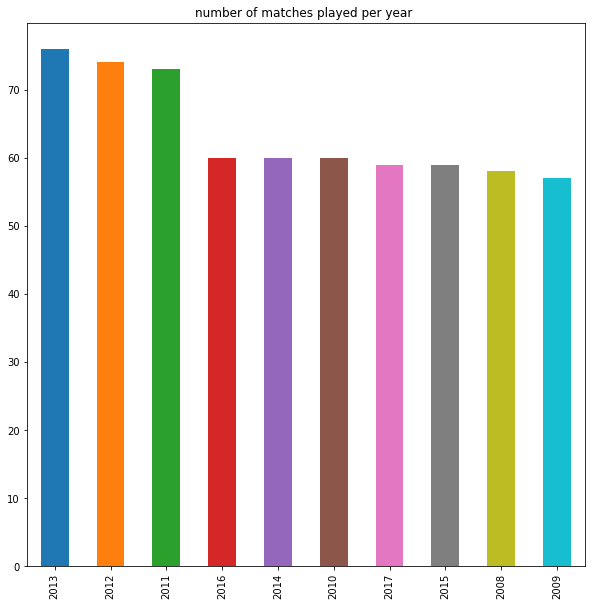

In [55]:
matches['Date'].dt.year.value_counts().plot.bar(y =' year', figsize=(10, 10), title = 'number of matches played per year ')


In [56]:
print("Maximum number of matches were played in year 2013  i.e. 76 ")

Maximum number of matches were played in year 2013  i.e. 76 


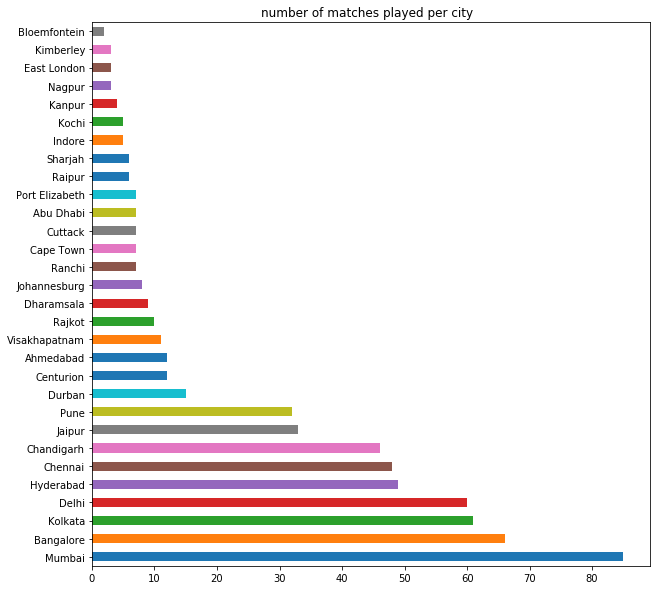

In [57]:
matches['city'].value_counts().plot.barh(y =' city', figsize=(10, 10), title = 'number of matches played per city  ')


In [58]:
print("Maximum number of matches were played in Mumbai   ")

Maximum number of matches were played in Mumbai   


In [59]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [60]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [61]:
deliveries.shape

(150460, 21)

In [62]:
delivery = deliveries.copy(deep = True )

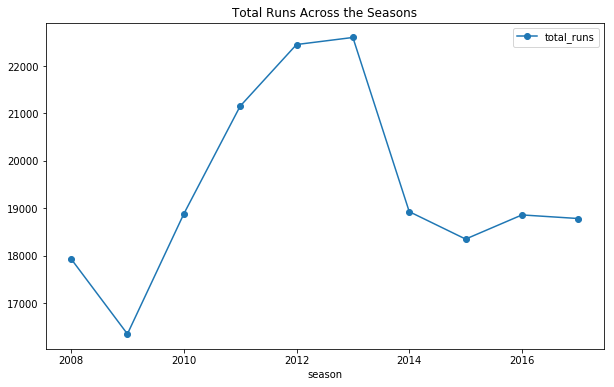

In [63]:
data  = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=data.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.show()



In [64]:
print('There is decline in total number of runs from 2008 to 2009 , then there continues increase from 2009 to 2013, then there if sudden decline of around 4000 runs in 2014, then there is little decline and a little increse in 2016.')

There is decline in total number of runs from 2008 to 2009 , then there continues increase from 2009 to 2013, then there if sudden decline of around 4000 runs in 2014, then there is little decline and a little increse in 2016.


Favorite Grounds


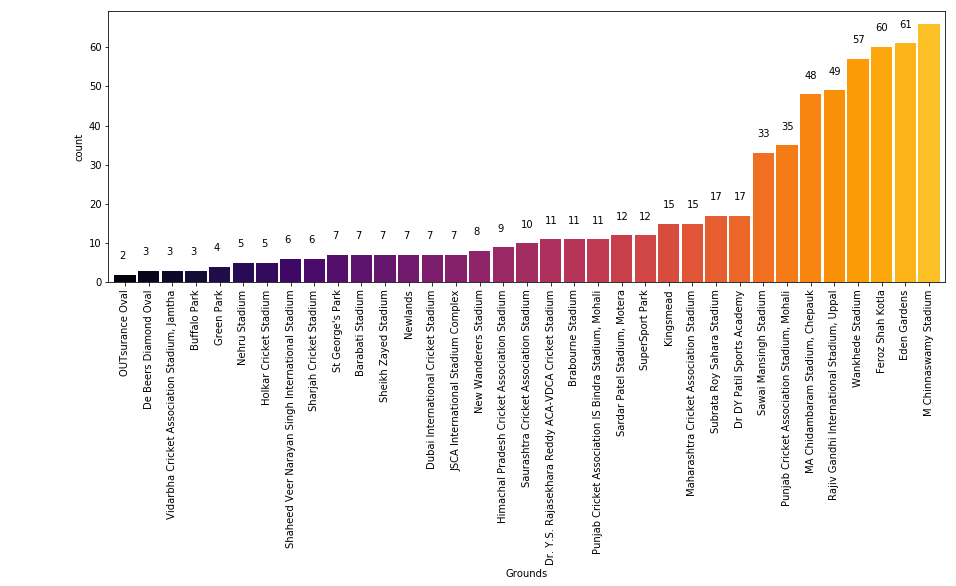

In [65]:
print("Favorite Grounds")
mlt.subplots(figsize=(15,5))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.bar(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.2, p.get_height()+4),fontsize=10)
mlt.show()


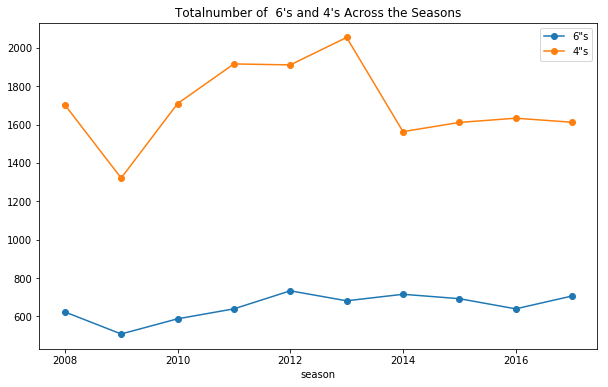

In [66]:
 df6 =data.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
df4=data.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
 df6 =df6.merge(df4,left_on='season',right_on='season',how='left')
df6=df6.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
df6.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.title("Totalnumber of  6's and 4's Across the Seasons")
mlt.show()

In [67]:
print("This plot shows the number of 6's and 4's across the seasons. we can see that number of 4's almost remains same , with a slight increase between year 2009 to 2012. ")

This plot shows the number of 6's and 4's across the seasons. we can see that number of 4's almost remains same , with a slight increase between year 2009 to 2012. 


In [68]:
print("Total number of 6's decreases from year 2008 to 2009 , but continue to increase till 2013 , then there is sudden decrease in 2014, after that it is almost constant.")

Total number of 6's decreases from year 2008 to 2009 , but continue to increase till 2013 , then there is sudden decrease in 2014, after that it is almost constant.


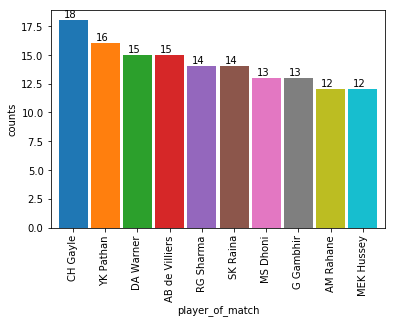

In [69]:
plo = matches['player_of_match'].value_counts().head(10).plot.bar(width= 0.9)
plo.set_xlabel('player_of_match')
plo.set_ylabel('counts')
for p in plo.patches:
    plo.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))


In [70]:
data[data['is_super_over']==1].match_id.nunique()

7

In [71]:
print('Total matches with super over = 7')

Total matches with super over = 7


Text(0.5,1,'number of times a umpire has been recruited')

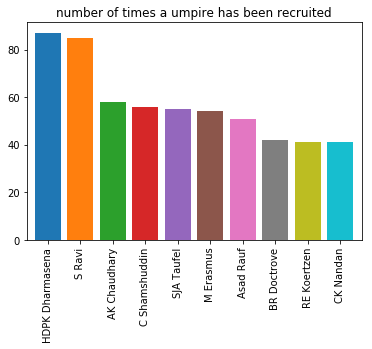

In [72]:
umpire =pd.concat([matches['umpire1'],matches['umpire2']]) 
umpire =umpire.value_counts().head(10).plot.bar(width=0.8  )
umpire.set_title('number of times a umpire has been recruited')

In [73]:
print("HDPK Dharmasena was recruited maximum number of times as umpire, and then S Ravi")

HDPK Dharmasena was recruited maximum number of times as umpire, and then S Ravi


In [74]:
print('Winners By Years')
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


In [75]:
print("As we can see that CSK has continuously won the IPL 2 times, MI and KKR have also won 2 times alternate years.")
print("By this we can say that CSK, MI, KKR are strong teams")

As we can see that CSK has continuously won the IPL 2 times, MI and KKR have also won 2 times alternate years.
By this we can say that CSK, MI, KKR are strong teams


In [76]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 

high_scores=high_scores[high_scores['total_runs']>=200]
 
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
596,296,1,KXIP,RCB,232
522,259,1,DD,KXIP,231
981,486,1,KXIP,CSK,231
100,50,1,KXIP,MI,230
1170,580,1,RCB,SRH,227


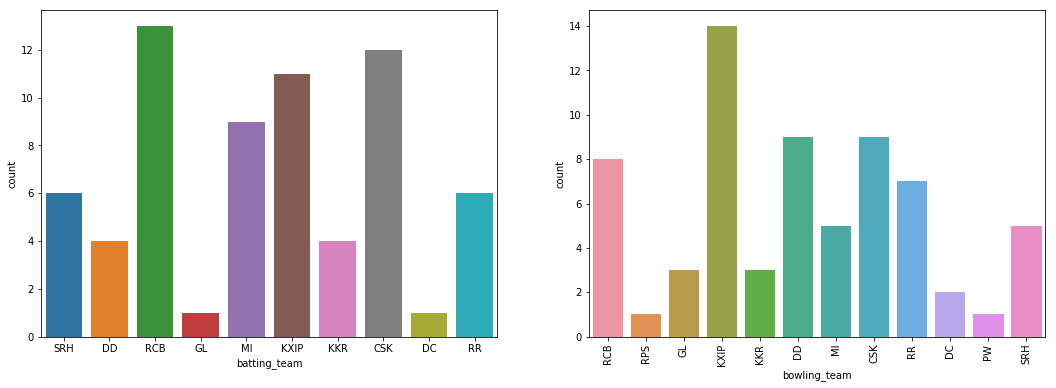

In [77]:
fig, ax =mlt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
mlt.xticks(rotation=90)
fig=mlt.gcf()
fig.set_size_inches(18,6)
mlt.show()

In [78]:
print('The graph on the left shows the number of times a team has scored above 200 runs. The graph on the right shows the  number of times a bowling team has conceeded above 200 runs.')

The graph on the left shows the number of times a team has scored above 200 runs. The graph on the right shows the  number of times a bowling team has conceeded above 200 runs.


In [79]:
print("So we can say that RCB and CSK have done good in terms of batting, with highest number runs.i.e >200 ")
 

So we can say that RCB and CSK have done good in terms of batting, with highest number runs.i.e >200 


In [80]:
print("Individual Scores of each player")
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

Individual Scores of each player


,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


In [81]:
top_scores.loc[top_scores['batsman_runs'].idxmax()]
print("CH Gayle scores the highest runs of 175")

CH Gayle scores the highest runs of 175


In [82]:
balls=delivery.groupby(['batsman'])['ball'].count().reset_index()
runs=delivery.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=delivery.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=delivery.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls.head()


,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,DC,10
1,A Ashish Reddy,196,280,142.857143,16,15,SRH,36
2,A Chandila,7,4,57.142857,0,0,RR,4
3,A Chopra,75,53,70.666667,7,0,KKR,24
4,A Choudhary,20,25,125.000000,1,1,RCB,15


In [83]:
print("I have created a function that compares 2 batsman based on their respective stats like runs or strike rate etc. First lets create a dataframe from where we will be taking all that values for comparison.")

I have created a function that compares 2 batsman based on their respective stats like runs or strike rate etc. First lets create a dataframe from where we will be taking all that values for comparison.


In [84]:
print("Now using this dataframe, we can compare stats like the strike rate, or the number of 6's for 4's etc. We will be passing the names of 2 batsmen and two comparing measures for the comparision.")

Now using this dataframe, we can compare stats like the strike rate, or the number of 6's for 4's etc. We will be passing the names of 2 batsmen and two comparing measures for the comparision.


In [85]:
balls.shape

(783, 8)

In [86]:
print('we have made a balls dataframe that contains information of batsman and its total runs with number of balls and strike rate , total number of 6''s and 4''s ')

we have made a balls dataframe that contains information of batsman and its total runs with number of balls and strike rate , total number of 6s and 4s 


In [87]:
def comparator(team1):
    teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)
    
comparator('KKR')

        MI  KKR
winner  16    5
        KKR  RCB
winner   11    9
        KKR  DC
winner    7   2
        CSK  KKR
winner   10    6
        RR  KKR
winner   9    6
        KKR  DD
winner   12   7
        GL  KKR
winner   3    1
        KKR  KXIP
winner   14     7
        KKR  SRH
winner    8    4
        KKR  RPS
winner    3    1
        KTK
winner    2
        KKR  PW
winner    4   1


In [88]:
print("Using this we can check how a team plays when it comes against other team")

Using this we can check how a team plays when it comes against other team


In [89]:
print("First let us see which teams have played and won the maximum finals")

First let us see which teams have played and won the maximum finals


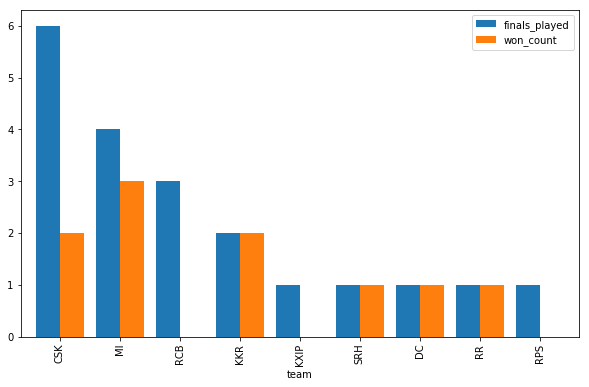

In [90]:
finals=matches.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.plot.bar(width=0.8)
mlt.gcf().set_size_inches(10,6)
mlt.show()

In [91]:
print("CSK has played 6 IPL finals but could win only 2,  followed by RCB with 3. CSK,MI,KKR have all won 2 titles each.But  RCB have never won a final even with 3 apperances.Looking at the graph .")

CSK has played 6 IPL finals but could win only 2,  followed by RCB with 3. CSK,MI,KKR have all won 2 titles each.But  RCB have never won a final even with 3 apperances.Looking at the graph .


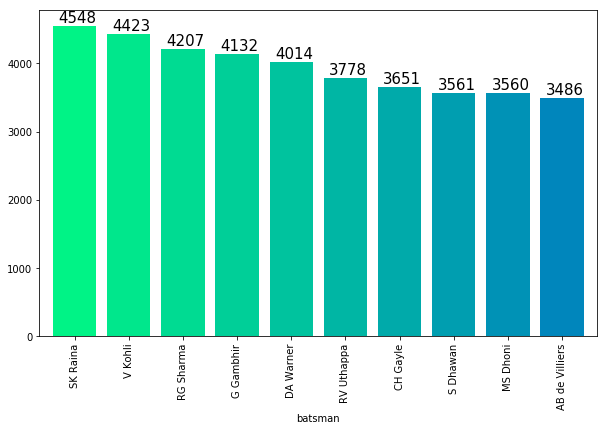

In [92]:
 
mlt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
mlt.show()
# top 10 batsman 

In [93]:
top = delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()

In [94]:
top=top.pivot('batsman','batsman_runs','total_runs')

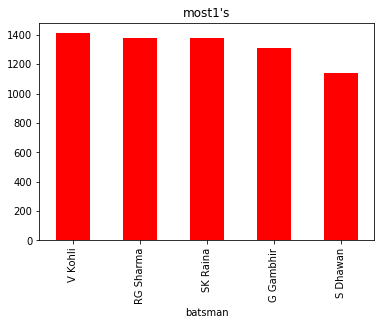

In [95]:
top[1].sort_values(ascending=False)[:5].plot.bar(color = 'r', title = "most1's")


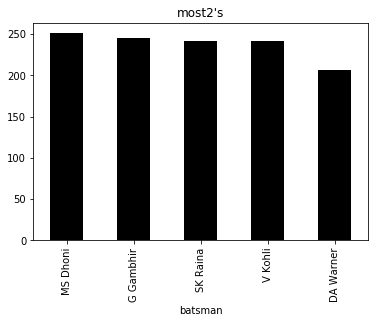

In [96]:
top[2].sort_values(ascending=False)[:5].plot.bar(color = '0', title = "most2's")


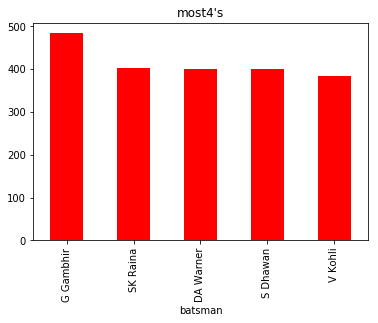

In [97]:
top[4].sort_values(ascending=False)[:5].plot.bar(color = 'r', title = "most4's")


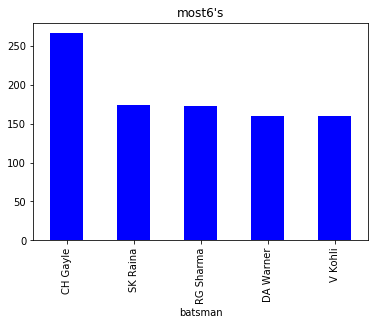

In [98]:
top[6].sort_values(ascending=False)[:5].plot.bar(color = 'b' ,title = "most6's")


In [99]:
print("Kohli has scored the maximum 1's, Dhoni has the maximum 2's . Those Strong Legs :p, Gambhir has the maximum 4's.C Gayle has the maximum 6's")

Kohli has scored the maximum 1's, Dhoni has the maximum 2's . Those Strong Legs :p, Gambhir has the maximum 4's.C Gayle has the maximum 6's


In [100]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


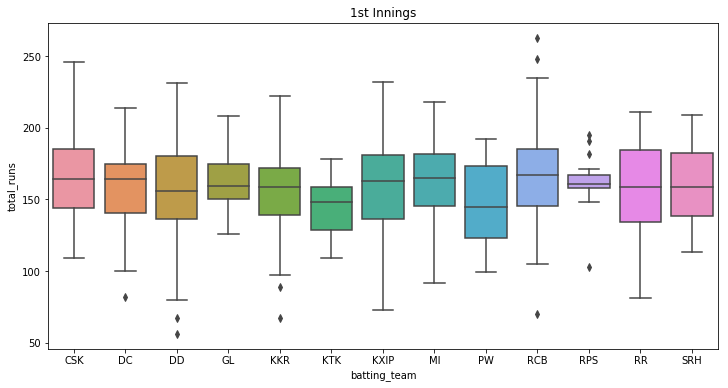

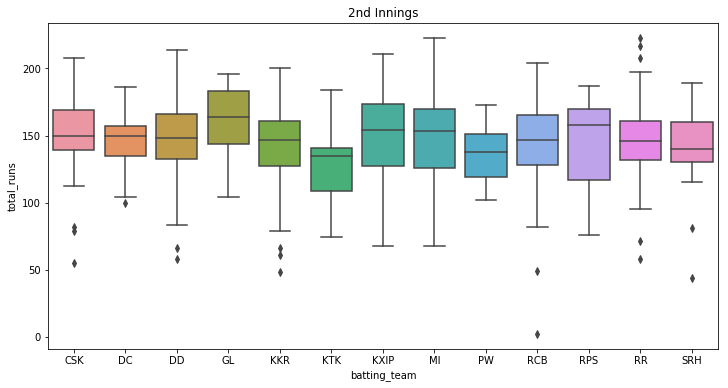

In [101]:
mlt.subplots(figsize=(12,6))
xyz=delivery.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
mlt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig=mlt.gcf()
fig.set_size_inches(12,6)


In [102]:
print("According to Graph 1 the batting by CSK in innings 1 looks to be the best. Graph 2 also conveys the same story.  ")

According to Graph 1 the batting by CSK in innings 1 looks to be the best. Graph 2 also conveys the same story.  


Highest wicket taker


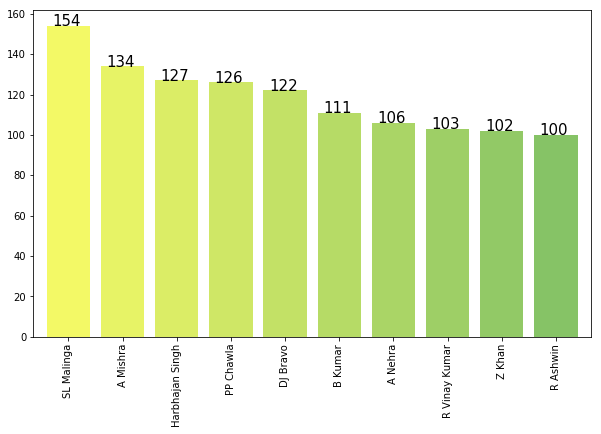

In [103]:
print('Highest wicket taker')
mlt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
mlt.show()



In [104]:
print('Malinga leads it')

Malinga leads it


In [105]:
print('Maximum overs')
eco=delivery.groupby(['bowler']).sum()
eco['total balls']=delivery['bowler'].value_counts()
eco['overs']=(eco['total balls']//6)
eco[eco['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

Maximum overs


,bowler,overs
0,Harbhajan Singh,498
1,A Mishra,450
2,SL Malinga,449
3,P Kumar,439
4,PP Chawla,432


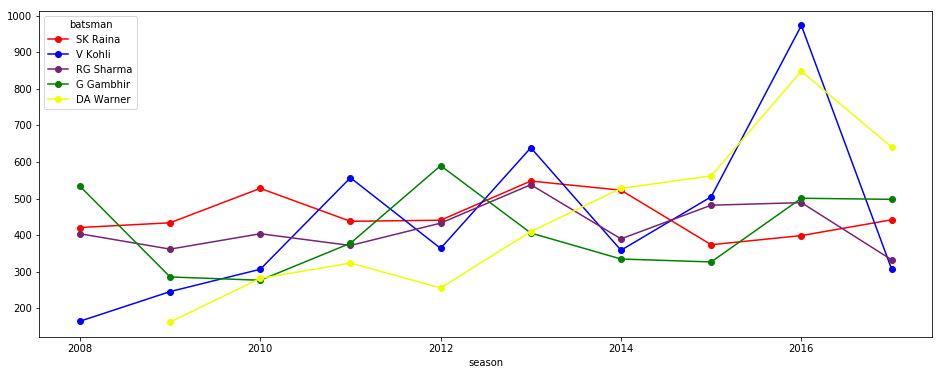

In [106]:
a=data.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=mlt.gcf()
fig.set_size_inches(16,6)
mlt.show()


In [107]:
print("David Warner's form looks to be improving season by season. There has been a sharp decline in Kohli's Runs in the   last season.")

David Warner's form looks to be improving season by season. There has been a sharp decline in Kohli's Runs in the   last season.


In [108]:
print("Orange Caps Each Season(Highest Run Getter per Season) (INTERACTIVE)")
orange=matches[['id','season']]
orange=orange.merge(delivery,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"],keep="first")
orange.sort_values(by='season')


Orange Caps Each Season(Highest Run Getter per Season) (INTERACTIVE)


,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


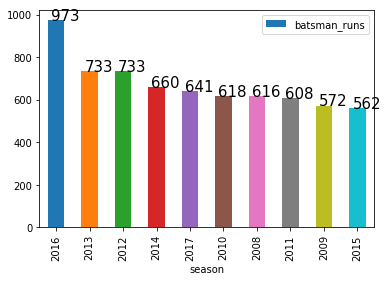

In [109]:

ax = orange.plot.bar(x = 'season', y = 'batsman_runs')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)

mlt.show()

In [110]:
ax=delivery[delivery['batsman_runs']==6].batting_team.value_counts().reset_index()
ax2=delivery[delivery['batsman_runs']==4].batting_team.value_counts().reset_index()
ax=ax.merge(ax2,left_on='index',right_on='index',how='left')
ax.rename({'index':'team','batting_team_x':"6s",'batting_team_y':"4s"},axis=1,inplace=True)

In [111]:
ax

,team,6s,4s
0,RCB,935,1978
1,MI,876,2145
2,KXIP,762,2083
3,CSK,742,1770
4,DD,686,1970
5,KKR,659,1978
6,RR,538,1630
7,DC,400,957
8,SRH,364,999
9,PW,196,525


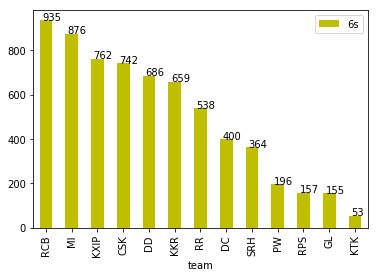

In [112]:
axx = ax.plot.bar(x = 'team', y = '6s', color = 'y')
for p in axx.patches:
    axx.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=10)

mlt.show()

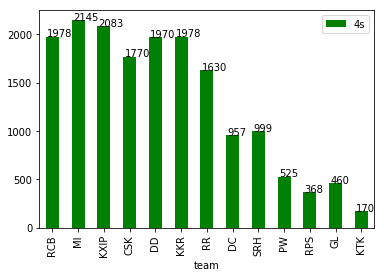

In [113]:
axx = ax.plot.bar(x = 'team', y = '4s', color = 'g')
for p in axx.patches:
    axx.annotate(format(p.get_height()), (p.get_x()+0.050, p.get_height()),fontsize=10)

mlt.show()